# Introduzione al Metodo Monte Carlo

## La Libreria Numpy e la generazione di Numeri Pseudo-Random

La libreria Numpy può essere utilizzata per la generazione di numeri $\textbf{pseudo-random}$ distribuiti secondo diversi distribuzioni di probabilità.

Numpy di fatto fornisce all'utente un interfaccia ad alto livello che non richiede la conoscenza della particolare implementazione dell'algoritmo


In [3]:
import numpy as np

Generiamo ora $10^6$ numeri casuali distribuiti secondo una distribuzione gaussiana:  $X \sim \mathcal{N}(0,1)$ (sono disponibili molte distribuzioni https://numpy.org/doc/1.16/reference/routines.random.html)

In [4]:
X = np.random.normal(0,1,int(1e6))

X è un vettore di numpy (ndarray sta per vettore n-dimensionale) anche se la dimensione è 1 in questo caso.
Con questi numeri possiamo fare 

In [5]:
type(X)

numpy.ndarray

In [6]:
X.shape

(1000000,)

Utilizziamo ora Matplotlib.pyplot per graficare i numeri che abbiamo appena campionato, utilizzeremo 
un tipo di grafico diverso, l'istogramma, attraverso l'uso della classe $\texttt{hist}$ di Matplotlib

In [7]:
import matplotlib.pyplot as plt

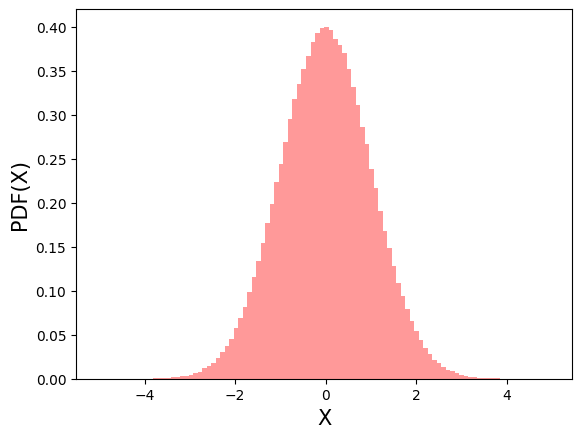

In [8]:
plt.hist(X,bins=100, density=True, histtype='stepfilled',color='red',alpha=0.4)
plt.xlabel('X',fontsize=15)
plt.ylabel('PDF(X)',fontsize=15)
plt.show()

## Esempio : operazioni tra variabili distribuite normalmente

Consideriamo un esempio molto semplice. 

Abbiamo una sbarra di metallo di lunghezza $L_{sbarra} = 25$ cm che dato il processo produttivo è accompagnata da una tolleranza $T=1$ cm.
Alla fine della sbarra va montano un supporto di lunghezza $L_{supporto} = 10 $ cm avente la stessa tolleranza della sbarra.

Vogliamo vedere come si sommano le tolleranze dell'assemblato finale sbarra+supporto.

Per fare questo dobbiamo conoscere la distribuzione di probabilità associata al processo di produzione, supponiamo per questo esempio semplice che le tolleranze
descrivano la deviazione standard di una distribuzione normale attorno al valor medio definito dalla lunghezza dell'oggetto in esame.

In questo caso è possibile procedere anche per via analitica sfruttando le proprietà della distribuzione normale, possiamo quindi confrontare
i risultati del Metodo Monte Carlo con il risultato analitico previsto.

Un piccolo reminder sulla distribuzione normale:

### Definizione a partire dalla distribuzione normale
$$
\mathcal{N}(\mu_1,\sigma_1) = \mu_1 + \mathcal{N}(0,1) \cdot \sigma_1
$$

### Somma di variabili gaussiane
$$
X \sim \mathcal{N}(\mu_1,\sigma_1)
$$
$$
Y \sim \mathcal{N}(\mu_2,\sigma_2)
$$
allora
$$
Z = X + Y = \sim \mathcal{N}(\mu_1+\mu_2,\sqrt{\sigma_1^2+\sigma_2^2})
$$

### Lunghezza di sbarra + supporto

Possiamo allora definire la lunghezza della nostra sbarra come:
$$
\mathbf{L} = \mathcal{N}(L_{sbarra},T)
$$
mentre per il supporto
$$
\mathbf{S} = \mathcal{N}(L_{supporto},T)
$$
otteniamo dunque:
$$
\mathbf{L}+\mathbf{S} = \mathcal{N}(L_{sbarra},T) + \mathcal{N}(L_{supporto},T) = \mathcal{N}(L_{sbarra}+L_{supporto},\sqrt{2}T)
$$


In [9]:
def sum_distributions(pars):
    
    return sum(pars)

def gaussian(x,mu=0,sigma=1):
    return 1.0/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2)

Proviamo ora a graficare la distribuzione della variabile casuale Y = $\mathcal{N}(0,1) + \mathcal{N}(1,1)$

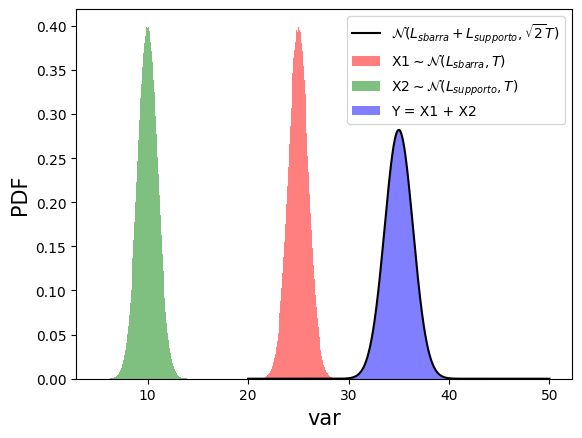

In [13]:
X1 = np.random.normal(25,1,int(1e6))
X2 = np.random.normal(10,1,int(1e6))

Y  = sum_distributions([X1,X2])

plt.hist(X1,bins=100, density=True, histtype='stepfilled',color='red',alpha=0.5, label=r'X1$\sim \mathcal{N}(L_{sbarra},T)$')
plt.hist(X2,bins=100, density=True, histtype='stepfilled',color='green',alpha=0.5, label='X2$\sim \mathcal{N}(L_{supporto},T)$')
plt.hist(Y,bins=100, density=True, histtype='stepfilled',color='blue',alpha=0.5, label='Y = X1 + X2')

plt.plot(np.linspace(20,50,1000),gaussian(np.linspace(20,50,1000),35,np.sqrt(2)), color='black', label=r'$\mathcal{N}(L_{sbarra}+L_{supporto},\sqrt{2}T)$')

plt.xlabel('var',fontsize=15)
plt.ylabel('PDF',fontsize=15)
plt.legend(fontsize=10)
plt.show()